In [ ]:
from Source.Models.ddpm import DDPM
from Source.Util.util import load_params, get_device
import torch
import matplotlib.pyplot as plt
import numpy as np

from Source.Util.plots import plot_obs, plot_deta_dphi
from Source.Util.preprocessing import preprocess, undo_preprocessing


In [2]:
p = load_params("/Users/huetsch/Desktop/Diffusion/params/Z2_Experiment_gpu.yaml")
device = get_device()
p["device"] = device


In [3]:
model = DDPM(p)


In [4]:
state_dict = torch.load("/Users/huetsch/Desktop/Diffusion/runs/z2/DDPM_Test7845/checkpoint.pt"
                        , map_location = device)
model.load_state_dict(state_dict)


<All keys matched successfully>

In [5]:
samples = model.sample_n_parallel(100)


In [20]:
data = np.load("/Users/huetsch/Desktop/data/Z_2.npy")


In [21]:
channels = [9, 10, 13, 14]
data_pre, data_mean, data_std, data_u, data_s = preprocess(data, channels)

data_undone = undo_preprocessing(data_pre, data_mean, data_std, data_u, data_s, channels, False)
samples_undone = undo_preprocessing(samples, data_mean, data_std, data_u, data_s, channels, False)

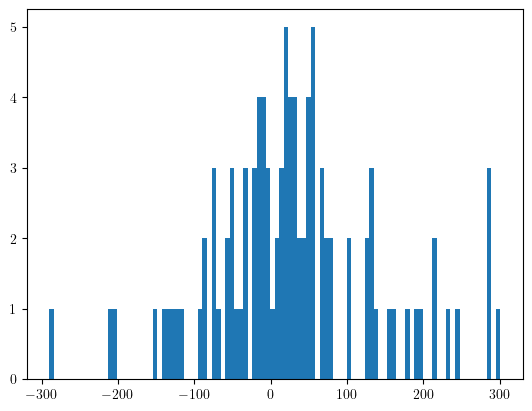

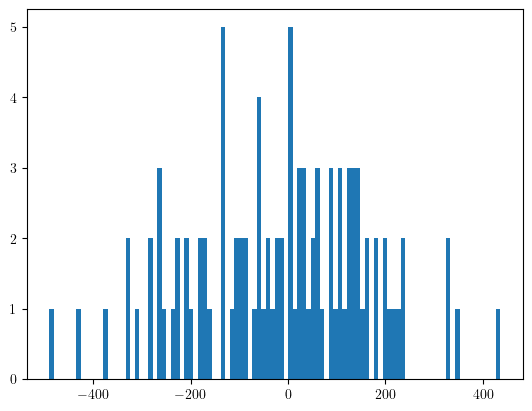

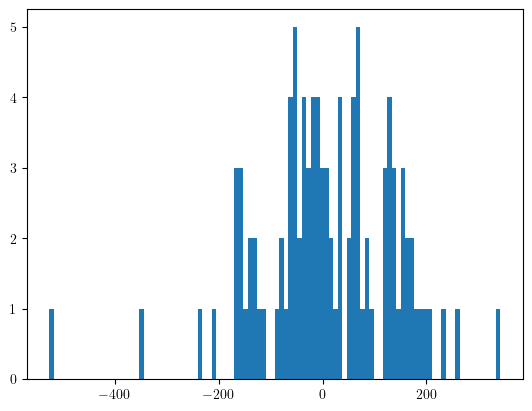

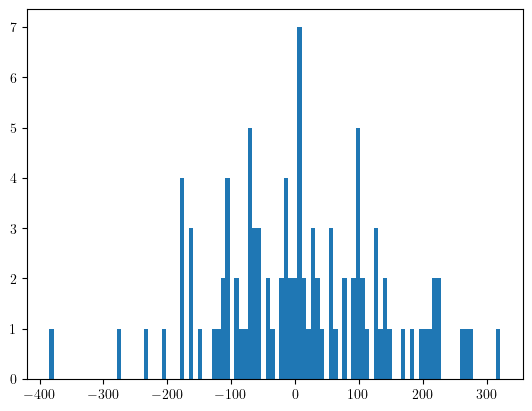

In [48]:
plt.hist(samples[:, 0], bins=100)
plt.show()

plt.hist(samples[:, 1], bins=100)
plt.show()

plt.hist(samples[:, 2], bins=100)
plt.show()

plt.hist(samples[:, 3], bins=100)
plt.show()

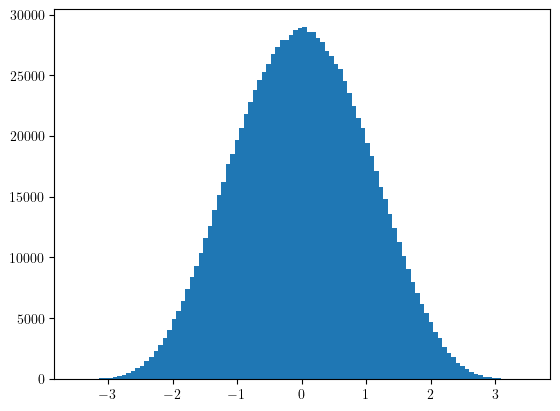

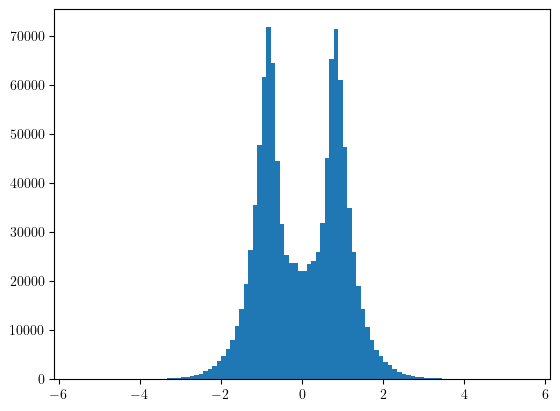

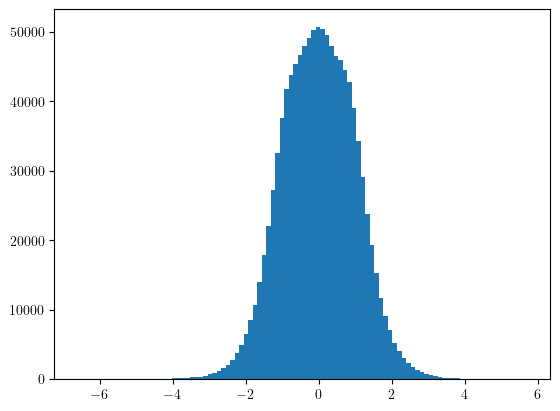

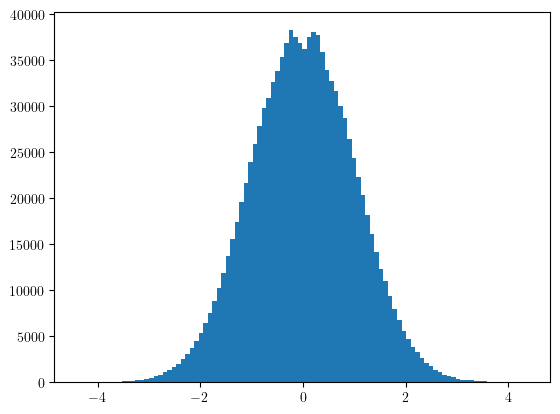

In [47]:
plt.hist(data_pre[:, 0], bins=100)
plt.show()

plt.hist(data_pre[:, 1], bins=100)
plt.show()

plt.hist(data_pre[:, 2], bins=100)
plt.show()

plt.hist(data_pre[:, 3], bins=100)
plt.show()

In [28]:
timesteps = 1000
dim = 4

In [38]:
noise = torch.randn(timesteps, 1, dim).to(device)
x = noise[0]
for t in reversed(range(timesteps)):
    z = noise[t] if t > 0 else 0
    model_pred = model.net(x, t*torch.ones_like(x[:, [0]])).detach()
    x = model.mu_tilde_t(x, t, model_pred) + model.sigmas[t]*z
s = x.cpu().numpy().flatten()

tensor([[ 0.1259,  0.1882, -0.0344, -0.3676]])
tensor([[ 0.1322,  0.2076, -0.0483, -0.4152]])
tensor([[ 0.1359,  0.1929, -0.0646, -0.3975]])
tensor([[ 0.1268,  0.0696, -0.0508, -0.1464]])
tensor([[ 0.1173,  0.1093, -0.0185, -0.2022]])
tensor([[ 0.1130,  0.1535,  0.0037, -0.2737]])
tensor([[ 0.1208,  0.1735, -0.0208, -0.3296]])
tensor([[ 0.1184,  0.0889, -0.0222, -0.1646]])
tensor([[ 0.1173,  0.0642, -0.0163, -0.1120]])
tensor([[ 0.1359, -0.0763, -0.1138,  0.0943]])
tensor([[ 0.1395,  0.0328, -0.0909, -0.1024]])
tensor([[ 0.1205,  0.0238, -0.0223, -0.0370]])
tensor([[ 0.1073,  0.0688,  0.0241, -0.0936]])
tensor([[ 0.0972,  0.1286,  0.0716, -0.1783]])
tensor([[ 0.0902,  0.1197,  0.1104, -0.1342]])
tensor([[ 0.0953,  0.0679,  0.0845, -0.0504]])
tensor([[ 0.1335, -0.0200, -0.0683,  0.0162]])
tensor([[0.0913, 0.0306, 0.1235, 0.0497]])
tensor([[0.0818, 0.0356, 0.2044, 0.0962]])
tensor([[0.1112, 0.0055, 0.0230, 0.0301]])
tensor([[ 0.1174,  0.0200, -0.0082, -0.0198]])
tensor([[ 0.1242, -0.0253

tensor([[ 0.8960,  0.5644, -1.3015, -2.0154]])
tensor([[ 0.9088,  0.5436, -1.3953, -1.9844]])
tensor([[ 0.9871,  0.5732, -1.5232, -2.1074]])
tensor([[ 1.0189,  0.5650, -1.5914, -2.1153]])
tensor([[ 0.9632,  0.5958, -1.4157, -2.1368]])
tensor([[ 0.9819,  0.6145, -1.4166, -2.1893]])
tensor([[ 1.0018,  0.6388, -1.3993, -2.2558]])
tensor([[ 0.9544,  0.5924, -1.3985, -2.1221]])
tensor([[ 0.9651,  0.5707, -1.4792, -2.0856]])
tensor([[ 0.9373,  0.5594, -1.4344, -2.0401]])
tensor([[ 0.9523,  0.5932, -1.3894, -2.1218]])
tensor([[ 0.9928,  0.5878, -1.5137, -2.1436]])
tensor([[ 0.9242,  0.5922, -1.2753, -2.0880]])
tensor([[ 0.9482,  0.6102, -1.2788, -2.1329]])
tensor([[ 0.9164,  0.6007, -1.1961, -2.0586]])
tensor([[ 0.7792,  0.6572, -0.8698, -1.8738]])
tensor([[ 0.6815,  0.7138, -0.6357, -1.8419]])
tensor([[ 0.6782,  0.7166, -0.6183, -1.8400]])
tensor([[ 0.7013,  0.6515, -0.7662, -1.7855]])
tensor([[ 0.6910,  0.6931, -0.7168, -1.8386]])
tensor([[ 0.6222,  0.6275, -0.6549, -1.6676]])
tensor([[ 0.6

tensor([[ 1.6134,  1.0872, -1.8628, -3.5487]])
tensor([[ 1.6385,  1.1056, -1.8842, -3.6020]])
tensor([[ 1.6485,  1.0874, -1.9582, -3.6216]])
tensor([[ 1.6407,  1.1048, -1.8917, -3.6067]])
tensor([[ 1.6492,  1.1040, -1.9162, -3.6247]])
tensor([[ 1.6401,  1.1139, -1.8702, -3.6055]])
tensor([[ 1.6522,  1.1020, -1.9294, -3.6310]])
tensor([[ 1.6376,  1.1411, -1.8105, -3.5982]])
tensor([[ 1.6162,  1.1103, -1.8203, -3.5536]])
tensor([[ 1.5998,  1.1181, -1.7688, -3.5176]])
tensor([[ 1.6155,  1.0817, -1.8831, -3.5538]])
tensor([[ 1.5851,  1.1005, -1.7679, -3.4865]])
tensor([[ 1.6009,  1.0953, -1.8157, -3.5221]])
tensor([[ 1.6381,  1.1236, -1.8462, -3.6011]])
tensor([[ 1.6236,  1.1174, -1.8245, -3.5698]])
tensor([[ 1.5929,  1.1206, -1.7514, -3.5040]])
tensor([[ 1.5642,  1.1297, -1.6866, -3.4536]])
tensor([[ 1.5725,  1.1592, -1.6740, -3.4901]])
tensor([[ 1.5674,  1.2055, -1.6356, -3.5289]])
tensor([[ 1.5318,  1.2577, -1.5542, -3.5472]])
tensor([[ 1.5461,  1.2292, -1.5907, -3.5263]])
tensor([[ 1.5

tensor([[ 2.3602,  1.5182, -2.8984, -5.1431]])
tensor([[ 2.3436,  1.5086, -2.8775, -5.1086]])
tensor([[ 2.3497,  1.5138, -2.8803, -5.1215]])
tensor([[ 2.3282,  1.4953, -2.8703, -5.0760]])
tensor([[ 2.3315,  1.5039, -2.8547, -5.0833]])
tensor([[ 2.3438,  1.4980, -2.9046, -5.1070]])
tensor([[ 2.3370,  1.5115, -2.8456, -5.0944]])
tensor([[ 2.3307,  1.5058, -2.8458, -5.0817]])
tensor([[ 2.3698,  1.5136, -2.9357, -5.1611]])
tensor([[ 2.3781,  1.4949, -2.9810, -5.1636]])
tensor([[ 2.3894,  1.5004, -2.9956, -5.1856]])
tensor([[ 2.3689,  1.4861, -2.9749, -5.1418]])
tensor([[ 2.3842,  1.4958, -2.9919, -5.1738]])
tensor([[ 2.3810,  1.4760, -3.0079, -5.1444]])
tensor([[ 2.4122,  1.4797, -3.0581, -5.1846]])
tensor([[ 2.3909,  1.4585, -3.0413, -5.1276]])
tensor([[ 2.4116,  1.4717, -3.0644, -5.1713]])
tensor([[ 2.4059,  1.4649, -3.0609, -5.1543]])
tensor([[ 2.4307,  1.4803, -3.0889, -5.2056]])
tensor([[ 2.4391,  1.4529, -3.1288, -5.1658]])
tensor([[ 2.4230,  1.4718, -3.0835, -5.1838]])
tensor([[ 2.4

In [37]:
def mu_tilde_t(xT, t, noise):
    return (1./model.sqrt_alphas[t]) * (xT - noise*model.betas[t]/model.sqrt_One_minus_alphas_bar[t])

In [84]:
t = torch.randint(low=1, high=timesteps, size=(len(data), 1), device=device)

In [88]:
xT = model.xT_from_x0_and_noise(data_pre, t[:3], np.random.randn(data_pre.shape[0], data_pre.shape[1]))

ValueError: operands could not be broadcast together with shapes (3,1) (1110181,4) 

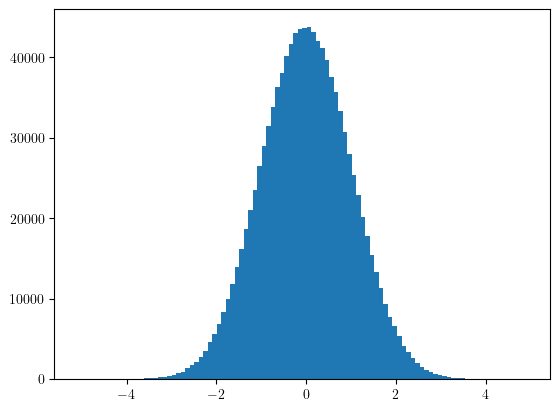

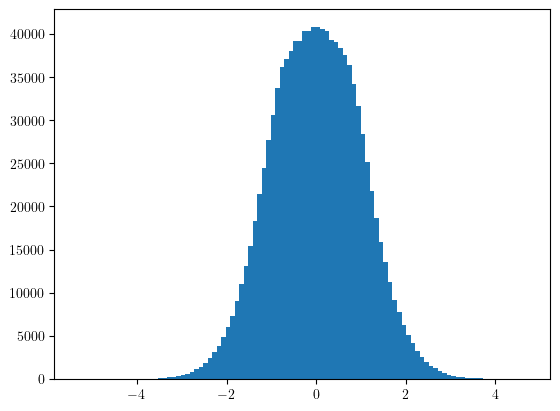

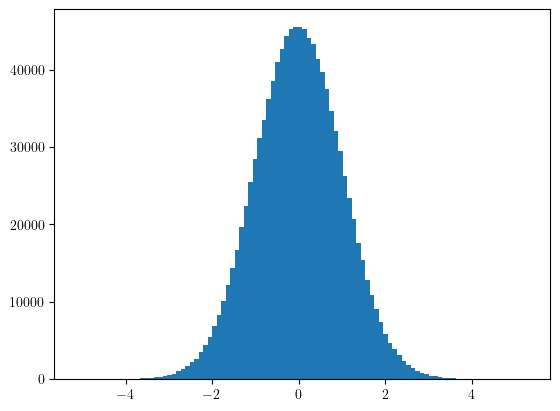

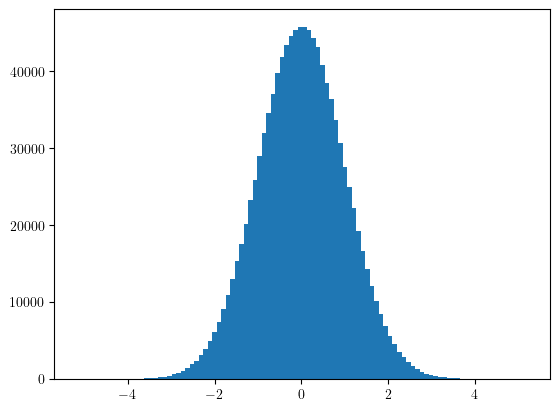

In [86]:
plt.hist(xT[:, 0], bins=100)
plt.show()

plt.hist(xT[:, 1], bins=100)
plt.show()

plt.hist(xT[:, 2], bins=100)
plt.show()

plt.hist(xT[:, 3], bins=100)
plt.show()